<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/AirPollution_BiLSTM_BiGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive


In [1]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns

Saving Wanshouxigong.csv to Wanshouxigong.csv


In [2]:
data=read_csv("/content/AirQuality.csv")
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Wanshouxigong.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [4]:
dataset = data
dataset.drop("NO2(GT)", axis=1, inplace=True)

In [5]:
dataset=dataset.fillna(method="pad")

In [6]:
dataset.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [7]:
dataset.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [8]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

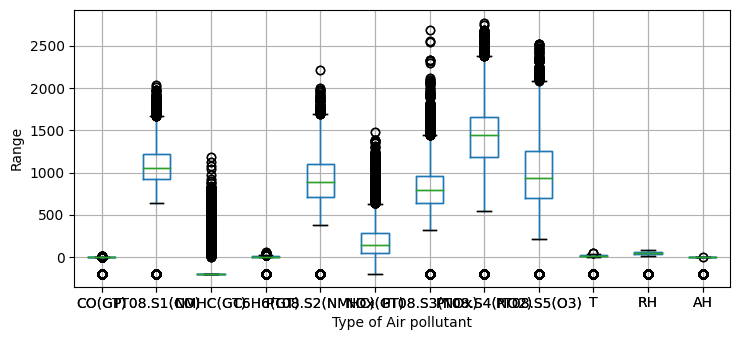

In [9]:
#Box plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./isobaric.jpg', dpi=400)
plt.show()

<ipython-input-10-9a6b606f1dde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dataset.corr()))
<ipython-input-10-9a6b606f1dde>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)


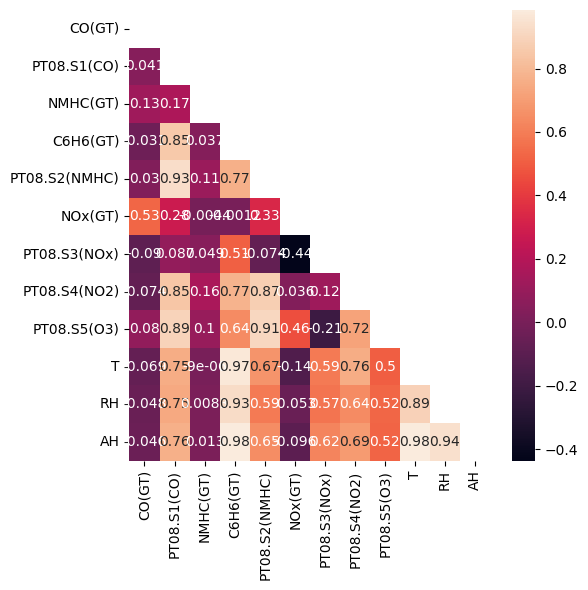

In [10]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
dataset.drop(['Date','Time'],axis=1,inplace=True)
# Encode non categorical values
values = dataset.values
# encoder = LabelEncoder()
# values[:,10] = encoder.fit_transform(values[:,10])
# values = values.astype('float32')
values

array([[ 2.600e+00,  1.360e+03,  1.500e+02, ...,  1.360e+01,  4.890e+01,
         7.578e-01],
       [ 2.000e+00,  1.292e+03,  1.120e+02, ...,  1.330e+01,  4.770e+01,
         7.255e-01],
       [ 2.200e+00,  1.402e+03,  8.800e+01, ...,  1.190e+01,  5.400e+01,
         7.502e-01],
       ...,
       [ 2.400e+00,  1.142e+03, -2.000e+02, ...,  2.690e+01,  1.830e+01,
         6.406e-01],
       [ 2.100e+00,  1.003e+03, -2.000e+02, ...,  2.830e+01,  1.350e+01,
         5.139e-01],
       [ 2.200e+00,  1.071e+03, -2.000e+02, ...,  2.850e+01,  1.310e+01,
         5.028e-01]])

In [14]:
values

array([[ 2.600e+00,  1.360e+03,  1.500e+02, ...,  1.360e+01,  4.890e+01,
         7.578e-01],
       [ 2.000e+00,  1.292e+03,  1.120e+02, ...,  1.330e+01,  4.770e+01,
         7.255e-01],
       [ 2.200e+00,  1.402e+03,  8.800e+01, ...,  1.190e+01,  5.400e+01,
         7.502e-01],
       ...,
       [ 2.400e+00,  1.142e+03, -2.000e+02, ...,  2.690e+01,  1.830e+01,
         6.406e-01],
       [ 2.100e+00,  1.003e+03, -2.000e+02, ...,  2.830e+01,  1.350e+01,
         5.139e-01],
       [ 2.200e+00,  1.071e+03, -2.000e+02, ...,  2.850e+01,  1.310e+01,
         5.028e-01]])

In [15]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [16]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [17]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (9353, 1)
X (9353, 4, 12)


In [18]:
#Splitting the dataset
n_train = 1200
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (8153, 4, 12)
X_test (1200, 4, 12)
Y_train (8153, 1)
Y_test (1200, 1)


In [21]:
model = Sequential()
model.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 50, return_sequences = True)))
model.add(Dropout(0.2))


model.add(Bidirectional(GRU(units = 50)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [22]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath="/save.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
tb = TensorBoard('logs')
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,callbacks=[mcp,rlr],validation_data=(X_test, Y_test), verbose=1, shuffle=False)


Epoch 1/10
127/128 [============================>.] - ETA: 0s - loss: 0.0866
Epoch 1: val_loss improved from inf to 0.03693, saving model to /save.h5
128/128 [==============================] - 29s 69ms/step - loss: 0.0865 - val_loss: 0.0369 - lr: 0.0010
Epoch 2/10
128/128 [==============================] - ETA: 0s - loss: 0.0358
Epoch 2: val_loss improved from 0.03693 to 0.03572, saving model to /save.h5
128/128 [==============================] - 5s 35ms/step - loss: 0.0358 - val_loss: 0.0357 - lr: 0.0010
Epoch 3/10
127/128 [============================>.] - ETA: 0s - loss: 0.0335
Epoch 3: val_loss improved from 0.03572 to 0.03230, saving model to /save.h5
128/128 [==============================] - 4s 35ms/step - loss: 0.0335 - val_loss: 0.0323 - lr: 0.0010
Epoch 4/10
127/128 [============================>.] - ETA: 0s - loss: 0.0321
Epoch 4: val_loss did not improve from 0.03230
128/128 [==============================] - 6s 46ms/step - loss: 0.0321 - val_loss: 0.0343 - lr: 0.0010
Epoch

In [23]:
from keras.models import load_model
model.save('AirPollutionBiLSTMGRU.h5')

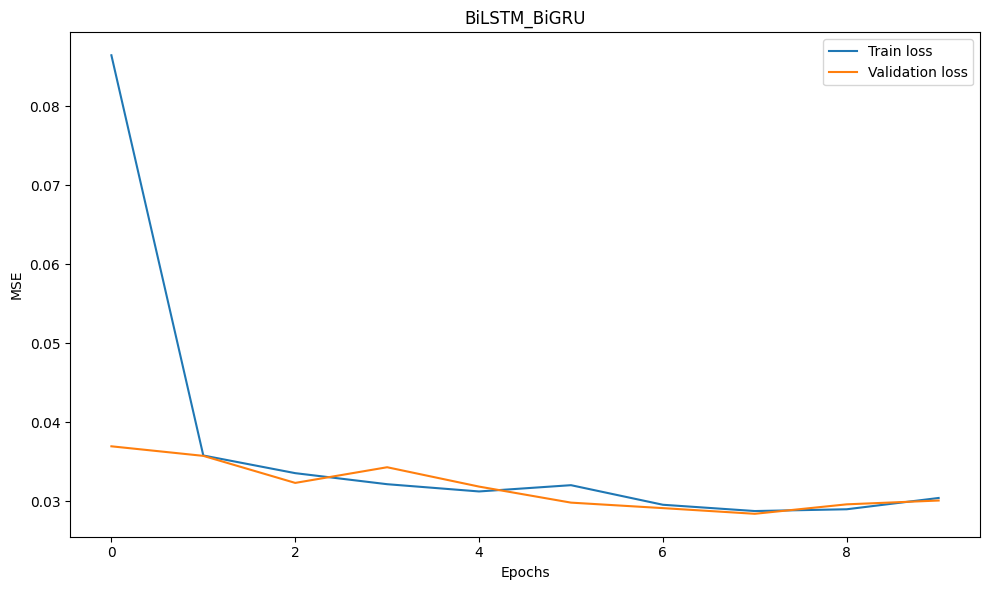

<Figure size 750x350 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("BiLSTM_BiGRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('Traingraph.png')

In [25]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 3s 12ms/step
RMSE at 40 = 57.56165372085516
RMAE at 40 = 4.721117786224451
MAPE at 40 = 7.343323497183877
R2 at 40 = -11.656035829417721
2/2 [==============================] - 0s 13ms/step
RMSE at 45 = 54.27043476917069
RMAE at 45 = 4.46133498136279
MAPE at 45 = 6.560009702641142
R2 at 45 = -11.402940712686643
2/2 [==============================] - 0s 11ms/step
RMSE at 50 = 51.48789357756178
RMAE at 50 = 4.248532350034832
MAPE at 50 = 5.931805779324999
R2 at 50 = -11.134837252923619
2/2 [==============================] - 0s 12ms/step
RMSE at 55 = 55.89022504908633
RMAE at 55 = 4.484853759501795
MAPE at 55 = 5.460847397549624
R2 at 55 = -14.56925665188119
2/2 [==============================] - 0s 12ms/step
RMSE at 60 = 54.014323686184404
RMAE at 60 = 4.448013182846613
MAPE at 60 = 6.239090070131932
R2 at 60 = -11.611757889082654
3/3 [==============================] - 0s 8ms/step
RMSE at 65 = 51.89703378691486
RMAE at 65 = 4.285962719900463
MAPE at 

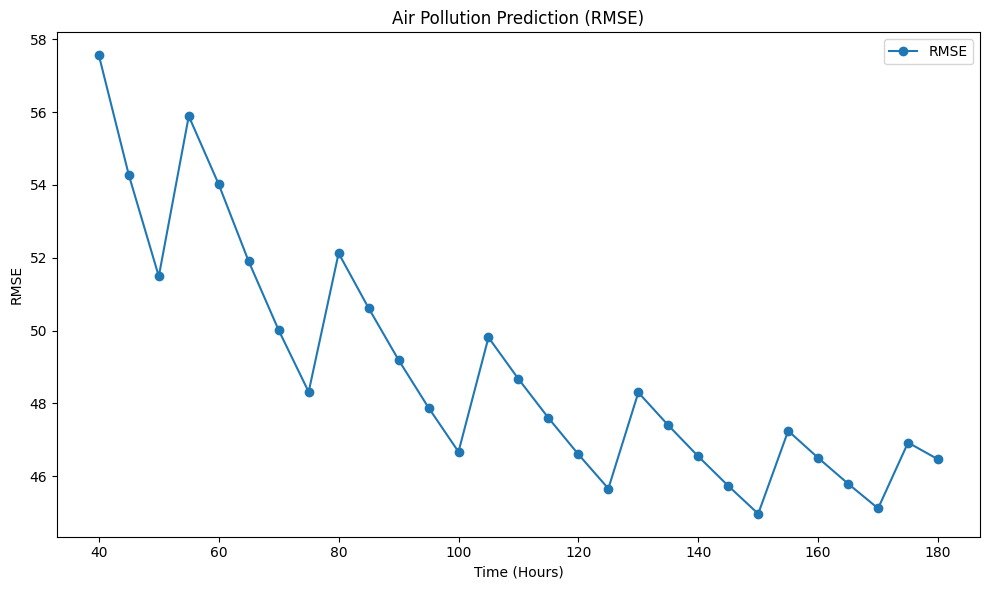

<Figure size 750x350 with 0 Axes>

In [26]:
x=[]
for i in range(40, 181, 5):
 x=np.append(x,i)
plt.figure(figsize=(10,6))  
#plt.plot(RMSE1, color= 'green',label = 'RMSE')
plt.plot(x,RMSE1,'o-', label = 'RMSE')
plt.title("Air Pollution Prediction (RMSE)")
plt.xlabel("Time (Hours)")
plt.ylabel("RMSE")
plt.legend()
plt.show()
plt.savefig('Predicted_CNNGRU_RMSE.png')
savetxt('RMSEBi-LSTM+GRU.csv', RMSE1, delimiter=',')

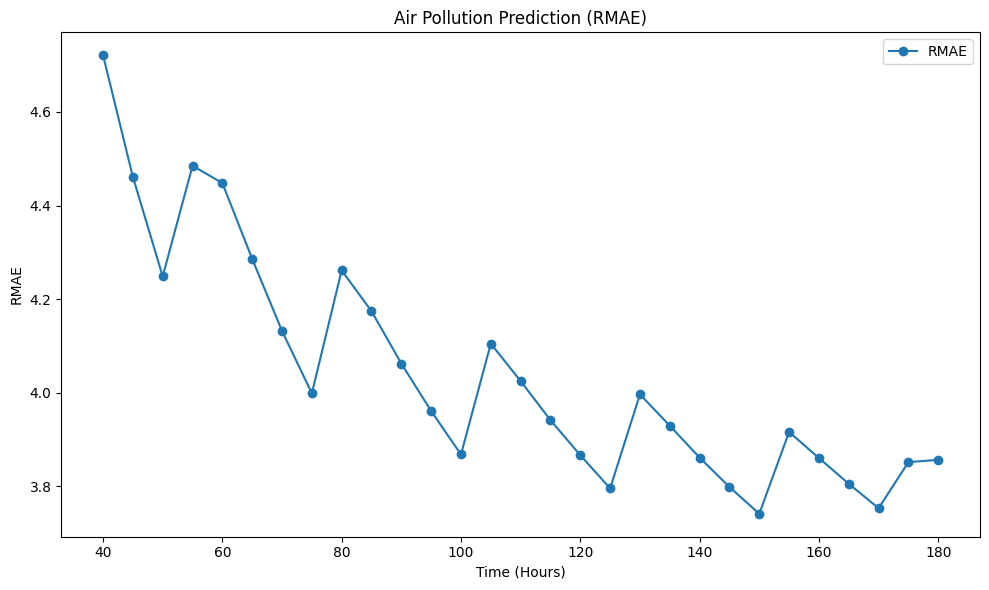

<Figure size 750x350 with 0 Axes>

In [27]:
x=[]
for i in range(40, 181, 5):
 x=np.append(x,i)
plt.figure(figsize=(10,6))  
#plt.plot(RMSE1, color= 'green',label = 'RMSE')
plt.plot(x,RMAE1, 'o-',label = 'RMAE')
plt.title("Air Pollution Prediction (RMAE)")
plt.xlabel("Time (Hours)")
plt.ylabel("RMAE")
plt.legend()
plt.show()
plt.savefig('Predicted_CNNGRU_RMSE.png')
savetxt('RMAEBi-LSTM+GRU.csv', RMAE1, delimiter=',')

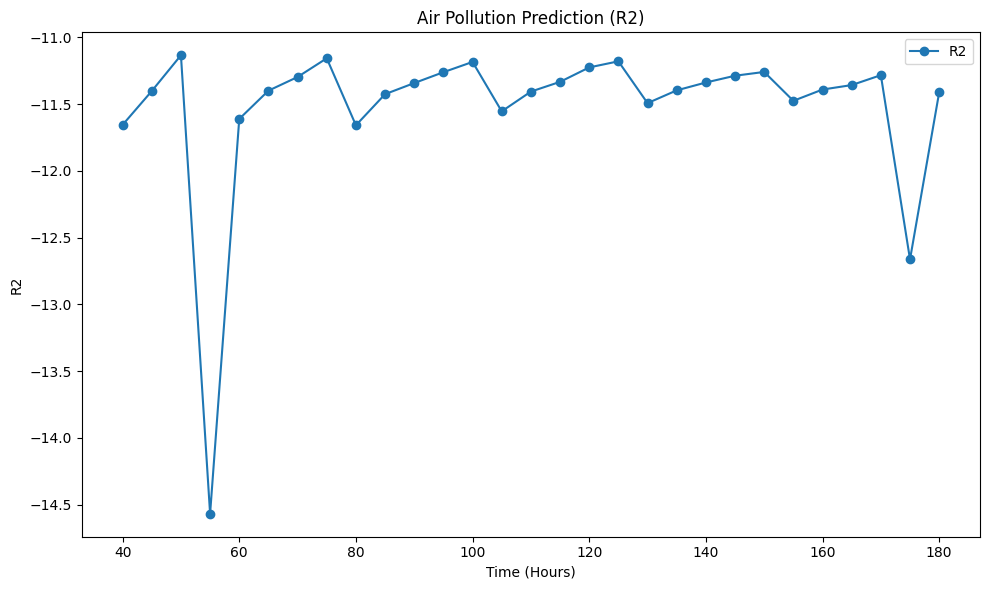

<Figure size 750x350 with 0 Axes>

In [28]:
x=[]
for i in range(40, 181, 5):
 x=np.append(x,i)
plt.figure(figsize=(10,6))  
#plt.plot(RMSE1, color= 'green',label = 'RMSE')
plt.plot(x,R22, 'o-', label='R2')
plt.title("Air Pollution Prediction (R2)")
plt.xlabel("Time (Hours)")
plt.ylabel("R2")
plt.legend()
plt.show()
plt.savefig('Predicted_CNNGRU_R2.png')
savetxt('R22Bi-LSTM+GRU.csv', R22, delimiter=',')

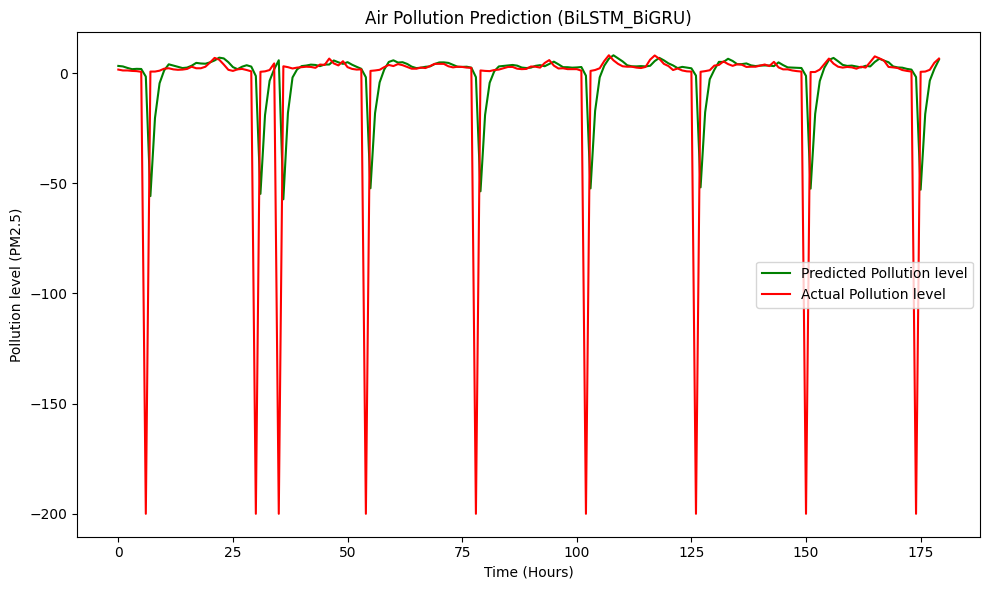

<Figure size 750x350 with 0 Axes>

In [29]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (BiLSTM_BiGRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphBiLSTMBi_GRU.png')

In [30]:
savetxt('Predict_BiLSTM_BiGRU.csv', Y_predicted, delimiter=',')

In [31]:
savetxt('Test_BiLSTMBiGRU.csv', Y_tested, delimiter=',')